# 📊 01 – Exploratory Data Analysis & Feature Engineering

## 🧠 Objective
Understand absenteeism behavior and prepare the data for modeling.

## 📥 1. Load and Explore the Dataset

We start by importing the cleaned absenteeism dataset and exploring its structure.

- The dataset contains 700 records and 15 features.
- Each row represents a work absence event, along with demographic and job-related attributes.
- `Reason_1` to `Reason_4` are binary flags representing grouped absence causes.
- No missing values were found as the data was already preprocessed.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [10]:
df = pd.read_csv('../data/Absenteeism_preprocessed.csv')

df.head()


,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [11]:
print("Shape:", df.shape)

print("\nColumn Types:\n", df.dtypes)

print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Shape: (700, 15)

Column Types:
 Reason_1                       int64
Reason_2                       int64
Reason_3                       int64
Reason_4                       int64
Month Value                    int64
Day of the Week                int64
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Pet                            int64
Absenteeism Time in Hours      int64
dtype: object

Missing Values:
 Reason_1                     0
Reason_2                     0
Reason_3                     0
Reason_4                     0
Month Value                  0
Day of the Week              0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.250000,0.008571,0.090000,0.597143,6.897143,2.410000,222.347143,29.892857,36.417143,271.801774,26.737143,0.167143,1.021429,0.687143,6.761429
std,0.433322,0.092250,0.286386,0.490823,3.342319,1.761669,66.312960,14.804446,6.379083,40.021804,4.254701,0.373370,1.112215,1.166095,12.670082
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,179.000000,16.000000,31.000000,241.476000,24.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,7.000000,2.000000,225.000000,26.000000,37.000000,264.249000,25.000000,0.000000,1.000000,0.000000,3.000000
75%,0.250000,0.000000,0.000000,1.000000,10.000000,4.000000,260.000000,50.000000,40.000000,294.217000,31.000000,0.000000,2.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,388.000000,52.000000,58.000000,378.884000,38.000000,1.000000,4.000000,8.000000,120.000000


## ⏱️ 2. Target Variable Distribution

We examine the distribution of the target: **Absenteeism Time in Hours**.

- Most employees are absent for **1–4 hours**, with a sharp drop-off afterward.
- A few extreme values (up to 120 hours) indicate potential outliers.
- The distribution is right-skewed, suggesting a **log transformation** may help modeling later.


In [12]:
# Checking unique values and frequency in the target column
df['Absenteeism Time in Hours'].value_counts().sort_index()

0       39
1       87
2      149
3      106
4       57
5        7
7        1
8      195
16      18
24      15
32       6
40       7
48       1
56       2
64       3
80       2
104      1
112      2
120      2
Name: Absenteeism Time in Hours, dtype: int64

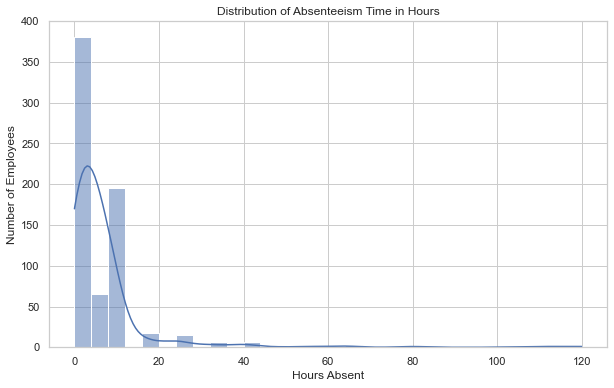

In [13]:
# Plotting the distribution of absenteeism time
plt.figure(figsize=(10, 6))
sns.histplot(df['Absenteeism Time in Hours'], bins=30, kde=True)
plt.title("Distribution of Absenteeism Time in Hours")
plt.xlabel("Hours Absent")
plt.ylabel("Number of Employees")
plt.show()

## 📈 3. Correlation Heatmap

We analyze pairwise correlations between all numerical features.

- Most variables show **weak correlation** with absenteeism time.
- `Reason_4` has a slight negative correlation (-0.31).
- Features like **Transportation Expense**, **Distance to Work**, and **Age** show some interdependence.

This confirms the target is not strongly linearly dependent on any single variable.


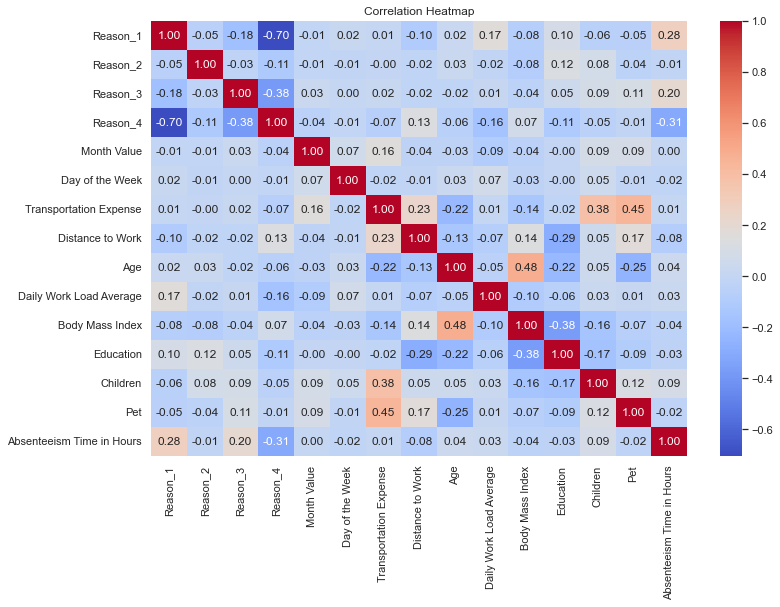

In [14]:
# Correlation heatmap for all numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


## 4. Compare Absenteeism Across Reason Groups

We compare the average absenteeism hours across different reason groups and visualize distributions using boxplots. This helps highlight which reasons are most disruptive.


In [15]:
# Compare average absenteeism time across reason groups
reason_cols = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
for col in reason_cols:
    avg = df.groupby(col)['Absenteeism Time in Hours'].mean()
    print(f"\nAverage Absenteeism by {col}:\n", avg)


Average Absenteeism by Reason_1:
 Reason_1
0     4.693333
1    12.965714
Name: Absenteeism Time in Hours, dtype: float64

Average Absenteeism by Reason_2:
 Reason_2
0    6.776657
1    5.000000
Name: Absenteeism Time in Hours, dtype: float64

Average Absenteeism by Reason_3:
 Reason_3
0     5.948195
1    14.984127
Name: Absenteeism Time in Hours, dtype: float64

Average Absenteeism by Reason_4:
 Reason_4
0    11.500000
1     3.564593
Name: Absenteeism Time in Hours, dtype: float64


## 5. Explore Categorical Features vs Absenteeism

Boxplots help us understand how absenteeism varies by categorical features such as education level, number of children, and pets.


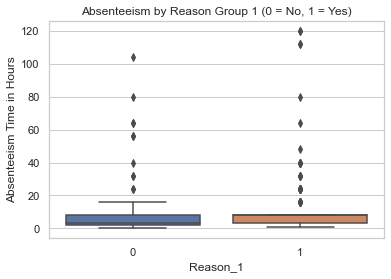

In [16]:
# Boxplot of absenteeism time by Reason_1
plt.figure(figsize=(6, 4))
sns.boxplot(x='Reason_1', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism by Reason Group 1 (0 = No, 1 = Yes)")
plt.show()

In [17]:
# Average absenteeism by education level
df.groupby('Education')['Absenteeism Time in Hours'].mean()

Education
0    6.941681
1    5.863248
Name: Absenteeism Time in Hours, dtype: float64

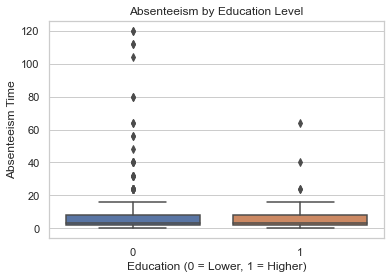

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism by Education Level")
plt.xlabel("Education (0 = Lower, 1 = Higher)")
plt.ylabel("Absenteeism Time")
plt.show()


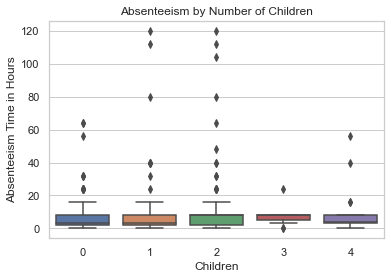

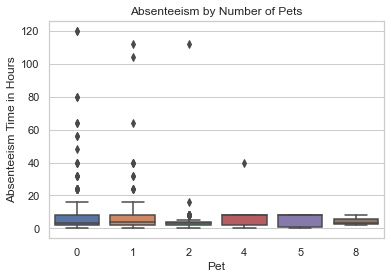

In [19]:
# Children
plt.figure(figsize=(6, 4))
sns.boxplot(x='Children', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism by Number of Children")
plt.show()

# Pet
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pet', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism by Number of Pets")
plt.show()


## 6. Explore Numeric Features vs Absenteeism

We use scatter plots to visualize the relationship between absenteeism and continuous variables like Distance to Work, Age, and BMI.


Text(0.5, 1.0, 'Absenteeism vs BMI')

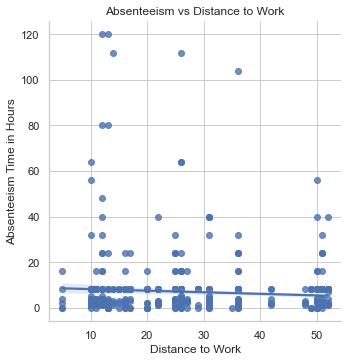

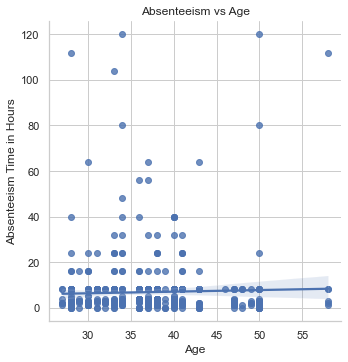

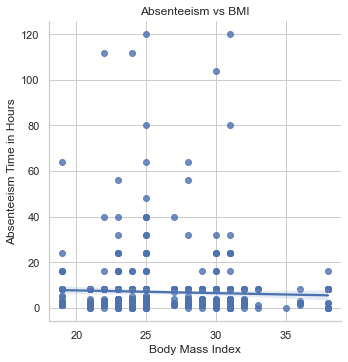

In [20]:
# Scatter plots for numerical variables
sns.lmplot(x='Distance to Work', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism vs Distance to Work")

sns.lmplot(x='Age', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism vs Age")

sns.lmplot(x='Body Mass Index', y='Absenteeism Time in Hours', data=df)
plt.title("Absenteeism vs BMI")


## 7. Feature Engineering — Combine Reason Columns

We consolidate multiple binary columns for reasons into a single `Reason_Group` column. This simplifies the dataset and prepares it for visualization or modeling.


In [21]:
def combine_reason(row):
    if row['Reason_1'] == 1:
        return 1
    elif row['Reason_2'] == 1:
        return 2
    elif row['Reason_3'] == 1:
        return 3
    elif row['Reason_4'] == 1:
        return 4
    else:
        return 0

df['Reason_Group'] = df.apply(combine_reason, axis=1)

df.drop(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'], axis=1, inplace=True)

df[['Reason_Group', 'Absenteeism Time in Hours']].head()


,Reason_Group,Absenteeism Time in Hours
0,4,4
1,0,0
2,4,2
3,1,4
4,4,2


## 8. Log Transformation of Target Variable

Absenteeism hours are highly skewed. Applying a log transformation helps normalize the distribution, which is often beneficial for regression models.


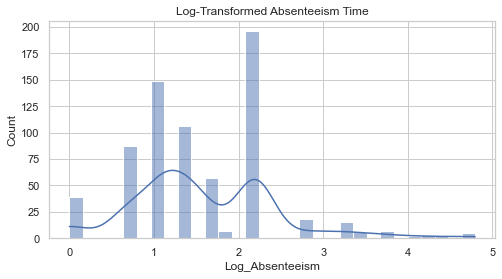

In [22]:
import numpy as np

df['Log_Absenteeism'] = np.log1p(df['Absenteeism Time in Hours'])  # log(1 + x)

plt.figure(figsize=(8,4))
sns.histplot(df['Log_Absenteeism'], bins=30, kde=True)
plt.title("Log-Transformed Absenteeism Time")
plt.show()


In [16]:
# Save for Tableau
df.to_csv('Absenteeism_Cleaned.csv', index=False)
